上一篇Notebook演示了如何在线获取数据，主要用到的函数是：QA_fetch_get_xxx系列

当然一般策略构建的时候，我们主要考虑的是从本地获取数据并进行分析，于是这篇Notebook将告诉你如何使用QA_fetch_xxx_adv系列

这篇Notebook用来演示QA在pd.DataFrame的基础上封装的DataStruct数据结构。

In [1]:
import QUANTAXIS as QA

### save金融数据到本地数据库

当你能成功引入最新版本QA包的时候，意味着你已经安装好了各种依赖包，并且本地开启了mongodb数据库，QA可以很方便的一键存储常用的金融数据到本地，你只需要在terminal输入QUANTAXIS，然后输入save,就会出现如下提示框，输入对应命令保存数据即可。

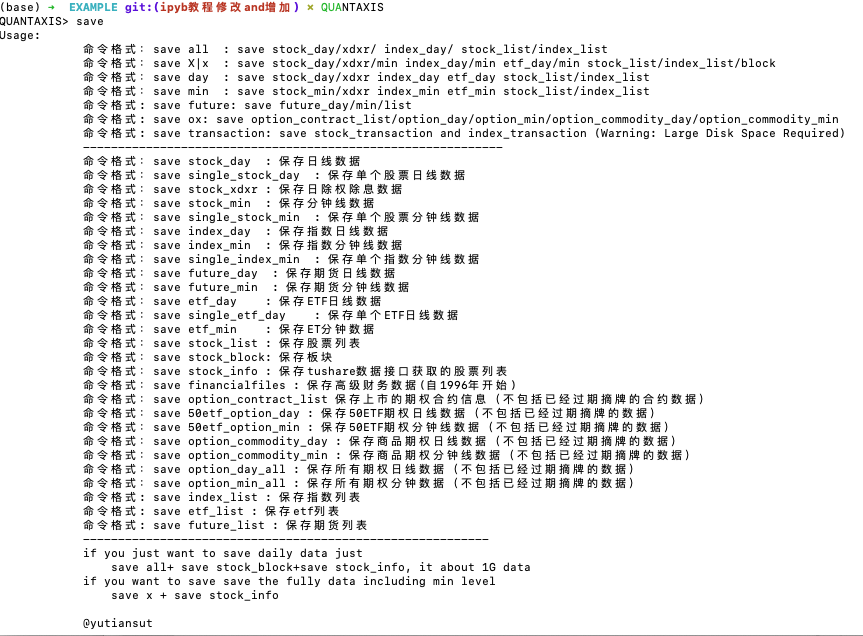

### 通过数据库获取数据

**通过本地数据库获取数据的方法为QA_fetch_xxx_adv系列**

接下来我们将演示如何通过数据库获取多个股票的日线["000001",'000002','000004']

如果你还没有保存数据可以尝试使用save stock_day命令保存所有股票日线,大概1G的数据。也可以尝试使用save single_stock_day 000001这样的命令把我们要演示的三个股票数据快速保存。

In [70]:
"""
通过本地数据库获取股票日线数据：
QA.QA_fetch_stock_day_adv(
    code,
    start='all',
    end=None,
    if_drop_index=True,
    collections=Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'quantaxis'), 'stock_day'),
)
"""

data=QA.QA_fetch_stock_day_adv(["000001",'000002','000004'],'2017-01-01','2017-11-30')

print(type(data)) # 得到的数据是在pd.DataFrame的基础上封装的DataStruct数据结构，比df多了很多特性和方法（接下来会演示
print(data)

<class 'QUANTAXIS.QAData.QADataStruct.QA_DataStruct_Stock_day'>
< QA_DataStruct_Stock_day with 3 securities >


In [45]:
# 也可以使用.data来获取我们熟悉的pd.DataFrame形式
df=data.data
print(type(df))
df.head(6)

<class 'pandas.core.frame.DataFrame'>


open   high    low  close    volume       amount  \
date       code                                                        
2017-01-03 000001   9.11   9.18   9.09   9.16  459840.0  420595168.0   
           000002  20.55  20.88  20.55  20.73  217016.0  449757472.0   
           000004  44.81  44.84  43.61  44.45    7154.0   31737710.0   
2017-01-04 000001   9.15   9.18   9.14   9.16  449329.0  411503456.0   
           000002  20.74  20.95  20.45  20.85  331554.0  686745344.0   
           000004  44.43  44.82  44.01  44.70    8719.0   38703388.0   

                   preclose  adj  
date       code                   
2017-01-03 000001       NaN  1.0  
           000002       NaN  1.0  
           000004       NaN  1.0  
2017-01-04 000001      9.16  1.0  
           000002     20.73  1.0  
           000004     44.45  1.0

In [22]:
# 多股票pd获取不重复index的方法
df.index.levels[0]

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-16',
               ...
               '2017-11-17', '2017-11-20', '2017-11-21', '2017-11-22',
               '2017-11-23', '2017-11-24', '2017-11-27', '2017-11-28',
               '2017-11-29', '2017-11-30'],
              dtype='datetime64[ns]', name='date', length=223, freq=None)

In [41]:
# 可以直接使用DataStruct来获得需要的值

data.open
data.close
data.high
data.low
data.date # df.date没有
data.datetime # df.datetime没有
data.code #df.code没有

Index(['000001', '000002', '000004'], dtype='object', name='code')

In [44]:
# 使用DataStruct可以批量对股票数据进行复权处理

#data=data.to_hfq() # 批量后复权
data=data.to_qfq() # 批量前复权

QUANTAXIS>> none support type for qfq Current type is: qfq


### 查看数据
DataStruct有三种方式可以查看数据

In [ ]:
t1=data.show() #log太长就不演示打印了

In [56]:
t2=data() #推荐直接使用()的方式查看数据 这个数据是Pandas.Dataframe格式
t2.head(6) 

open   high    low  close    volume       amount
date       code                                                     
2017-01-03 000001   9.11   9.18   9.09   9.16  459840.0  420595168.0
           000002  20.55  20.88  20.55  20.73  217016.0  449757472.0
           000004  44.81  44.84  43.61  44.45    7154.0   31737710.0
2017-01-04 000001   9.15   9.18   9.14   9.16  449329.0  411503456.0
           000002  20.74  20.95  20.45  20.85  331554.0  686745344.0
           000004  44.43  44.82  44.01  44.70    8719.0   38703388.0

In [58]:
t3=data.data
t3.head(6)

open   high    low  close    volume       amount
date       code                                                     
2017-01-03 000001   9.11   9.18   9.09   9.16  459840.0  420595168.0
           000002  20.55  20.88  20.55  20.73  217016.0  449757472.0
           000004  44.81  44.84  43.61  44.45    7154.0   31737710.0
2017-01-04 000001   9.15   9.18   9.14   9.16  449329.0  411503456.0
           000002  20.74  20.95  20.45  20.85  331554.0  686745344.0
           000004  44.43  44.82  44.01  44.70    8719.0   38703388.0

### 数据查询 .query()
DataStruct拥有很方便的数据查询功能，这也是对比df更好用的一个特性。

In [59]:
# 查询日期
data.query('date=="2017-01-03"')

open   high    low  close    volume       amount
date       code                                                     
2017-01-03 000001   9.11   9.18   9.09   9.16  459840.0  420595168.0
           000002  20.55  20.88  20.55  20.73  217016.0  449757472.0
           000004  44.81  44.84  43.61  44.45    7154.0   31737710.0

In [62]:
# 数据筛选--选取某一只股票的数据 select_code
data_000001=data.select_code('000001') #注意查询的结果还是DataStruct结构，要用()方法查看
data_000001().head(3)

,,open,high,low,close,volume,amount
date,code,,,,,,
2017-01-03,000001,9.11,9.18,9.09,9.16,459840.0,420595168.0
2017-01-04,000001,9.15,9.18,9.14,9.16,449329.0,411503456.0
2017-01-05,000001,9.17,9.18,9.15,9.17,344372.0,315769696.0


In [65]:
# 数据筛选- 选取某一段时间内的数据
res=data.select_time('2017-01-11','2017-01-31')
res().head(6)

open   high    low  close    volume       amount
date       code                                                     
2017-01-11 000001   9.14   9.17   9.13   9.14  303430.0  277553216.0
           000002  20.52  20.63  20.40  20.40  168652.0  345421504.0
           000004  43.00  43.35  42.45  42.45   10668.0   45700196.0
2017-01-12 000001   9.13   9.17   9.13   9.15  428006.0  391869408.0
           000004  42.10  42.78  42.04  42.05    7659.0   32499946.0
2017-01-13 000001   9.14   9.19   9.12   9.16  434301.0  397601920.0

In [71]:
# 如果end设置为空,则获取到从start开始到最后的所有数据
res=data.select_time('2017-11-11')
res().tail(6)

open   high    low  close     volume        amount
date       code                                                       
2017-11-29 000001  13.73  13.93  13.47  13.82  1564094.0  2.148313e+09
           000002  30.78  33.83  30.28  33.82   897712.0  2.894401e+09
           000004  26.47  26.59  25.06  25.52    30904.0  7.867043e+07
2017-11-30 000001  13.70  13.73  13.26  13.38  1379635.0  1.866701e+09
           000002  33.10  33.40  30.68  31.22  1000665.0  3.213854e+09
           000004  25.50  25.82  25.16  25.56    23286.0  5.926307e+07

In [76]:
# 数据筛选 - 选取某一个时间点向前向后的数据
# method
# lt 小于 <
# lte 小于等于  <=
# gt 大于 >
# gte 大于等于 >=
# e 等于 ==
res=data.select_time_with_gap(gap=5,method='lte',time='2017-01-31')
res().head(5)

open   high    low  close    volume       amount
date       code                                                     
2017-01-20 000001   9.17   9.23   9.17   9.22  393328.0  361865152.0
           000002  20.60  20.83  20.54  20.68  215053.0  444921472.0
           000004  35.66  36.65  35.11  36.48   14226.0   51336036.0
2017-01-23 000001   9.22   9.26   9.20   9.22  420299.0  388019072.0
           000002  20.70  20.85  20.70  20.74  156373.0  324581600.0

In [80]:
# 数据筛选 - 拿到某一天的股票数据
# if_trade的作用是  如果if_trade=False 则遇到停牌时 会返回最后一个交易日的bar
res=data.get_bar(code='000004',time='2017-01-20')
res

open            35.66
high            36.65
low             35.11
close           36.48
volume       14226.00
amount    51336036.00
Name: (2017-01-20 00:00:00, 000004), dtype: float64

In [85]:
# 数据切面 pivot,

res=data.pivot('open')
print (type(res)) #得到的df类型
res.head(3)

<class 'pandas.core.frame.DataFrame'>


code,000001,000002,000004
date,,,
2017-01-03,9.11,20.55,44.81
2017-01-04,9.15,20.74,44.43
2017-01-05,9.17,20.85,44.52


### 快速计算指标*
你可能需要对很多只股票同时计算指标，用DataStruct就可以非常方便的得到结果，要做的只不过是对数据块应用函数 add_func 就行了。

In [89]:
# 一般是配合指标函数去计算指标

# QA.QA_indicator_ATR  ATR指标

res=data.add_func(QA.QA_indicator_ATR,10)
res.tail(6)

TR    ATR
date       code               
2017-11-29 000001  0.46  0.743
           000002  3.55  1.890
           000004  1.53  2.420
2017-11-30 000001  0.56  0.754
           000002  3.14  2.098
           000004  0.66  2.158

### 格式转换 
to_dict 

to_list

to_numpy

In [91]:
res=data.to_dict()
print(res)

In [ ]:
res=data.to_list()
print(res)

In [ ]:
res=data.to_numpy()
print(res)

### 画图

In [94]:
data.plot('000001') #画某一只股票
data.plot()  #画全部股票

QUANTAXIS>> The Pic has been saved to your path: ./QA_stock_day_000001_bfq.html
QUANTAXIS>> The Pic has been saved to your path: ./QA_stock_day_None_bfq.html
